<a href="https://colab.research.google.com/github/Shweta-Shivhare/Sentiment_Analysis/blob/main/Colab_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=650px>

# `Section 1` Dataset Overview


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **1.2** Load and analyze Dataset

Very useful packages for Data Analysis. Don't hesitate to visit any of those sites in case you don't get what we are doing.
*   `Pandas`: https://pandas.pydata.org/docs/
*   `Numpy`: https://numpy.org/doc/





In [ ]:
import pandas as pd
import numpy as np

* Read Dataframe stored in Google Drive under `.csv` format

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/tweet_data.csv")

* Use the `sample` method to look at some random tweets present in our dataset

In [ ]:
df.sample(10)

,textID,tweet_text,sentiment
15712,1752697768,@reesnicole We should have a twitter reunion i...,positive
672,1957291084,@DantiChos baby help me with math,positive
2247,1960496091,Wants somebody to cheer her up,positive
10287,1694311181,@yojibee haha I need to get in better shape f...,negative
16860,1753238032,@tonyt787 I read them a couple of weeks ago T...,positive
18685,1753903145,@jaredmaine @kennedymaine @johnmaine @patmaine...,positive
5441,1963233938,@LiverpoolMich funny you should mention that. ...,negative
17244,1753398558,@Curren$y_Spitta Was caught in traffic around ...,positive
14567,1751921392,@o0CHiiNKz (blinks fast) its better now ... Lo...,positive
1028,1957482979,has had AWFUL hiccups today and now can't fall...,negative


* Check how many tweets there are in total

In [ ]:
print("Number of tweets: {}".format(len(df)))

Number of tweets: 18727


* Print a tweet and its sentiment based on a tweet ID

In [ ]:
tweet_id = 4873
tweet = df.iloc[tweet_id]


In [ ]:
print("Tweet: {}".format(tweet["tweet_text"]))
print("Tweet sentiment: {}".format(tweet["sentiment"]))

Tweet: And I just saw something real sad on my lunch... A dog with two broken back legs.
Tweet sentiment: negative


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **1.3** Dataset Visualization

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **1.3.1** Matplotlib</h4>

* Import the `pyplot` module from the matplotlib package 

In [ ]:
import matplotlib.pyplot as plt

* `pyplot` helps understanding and representing how tweets are distributed over the dataset

In [ ]:
sentiment_count = df['sentiment'].value_counts()
sentiment_count

positive    9897
negative    8830
Name: sentiment, dtype: int64

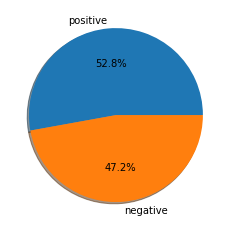

In [ ]:
plt.pie(sentiment_count, labels = sentiment_count.index, shadow = True , autopct = '%1.1f%%')
plt.show()

* Print the count of positive and negative tweets

In [ ]:
print("Number of + tweets: {}".format(df[df['sentiment'] == 'positive'].count()[0]))
print("Number of - tweets: {}".format(df[df['sentiment'] == 'negative'].count()[0]))

Number of + tweets: 9897
Number of - tweets: 8830


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **1.3.2** Wordclouds

* The `Wordclouds` package is very useful to get a quick overview of most recurrent words in the text corpus

In [ ]:
from wordcloud import WordCloud

* What are the words most often present in positive tweets?

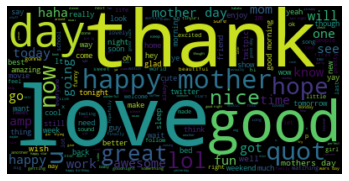

In [ ]:
pos_tweets = df[df['sentiment'] == 'positive']
txt = " ".join(tweet.lower() for tweet in pos_tweets["tweet_text"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

* ... and in negative tweets?

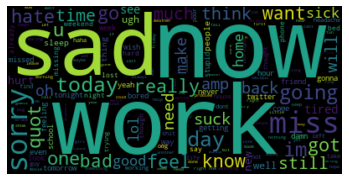

In [ ]:
neg_tweets = df[df['sentiment'] == 'negative']
txt = " ".join(tweet.lower() for tweet in neg_tweets["tweet_text"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=650px>

# `SECTION 2` Text Normalization

As this section relies quite a lot on `REGEX`, you might want to have a look at the following website: https://regexr.com/

* Import `regex` package

In [ ]:
import re

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.1** Twitter features

* Example of a *random* tweet that can be found on Twitter

In [ ]:
tweet = "RT @AIOutsider I love this! 👍 https://AIOutsider.com #NLP #Fun"

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.1.1** RT Tag

#### Need a hint?

* `R` : match "R" character
* `T` : match "T" character
* `\s` : match any whitespace character
* `+` : match one or more of the preceding tokens

#### Handle the RT Tag

* Replace occurences of `RT` with a default value

In [ ]:
def replace_retweet( tweet, default_replace = " "):
  tweet = re.sub('RT\s+', default_replace, tweet)
  return tweet


In [ ]:
#My way

print(f"Processed tweet:{(replace_retweet(tweet))}")

Processed tweet: @AIOutsider I love this! 👍 https://AIOutsider.com #NLP #Fun


In [ ]:
# Course way

print("Processed tweet: {}".format(replace_retweet(tweet)))

Processed tweet:  @AIOutsider I love this! 👍 https://AIOutsider.com #NLP #Fun


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.1.2** @User Tag

#### Need a hint?




* `\B` : match any position that is not a word boundary
* `@` : match "@" character
* `\w` : match any word character 
* `+` : match one or more of the preceding tokens

#### Handle the User Tag

* Replace `@_Someone_` with a default user tag

In [ ]:
def replace_user(tweet, default_replace = " "):
  tweet = re.sub('\B@\w+', default_replace, tweet)
  return tweet

In [ ]:
print("Processed tweet: {}".format(replace_user(tweet)))

Processed tweet: RT   I love this! 👍 https://AIOutsider.com #NLP #Fun


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.1.3** Emojis

* Install the `emoji` package

In [ ]:
pip install emoji --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 240 kB 14.8 MB/s 
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=bc8fb7cfb1a0ab669821c6e86b96e0ad6045ea92cbc38381b38e657212199016
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji


* Import the installed package

In [ ]:
import emoji

* Replace emojis with a meaningful text

In [ ]:
def demojize(tweet):
  tweet = emoji.demojize(tweet)
  return tweet

In [ ]:
print("Processed tweet: {}".format(demojize(tweet)))

Processed tweet: RT @AIOutsider I love this! :thumbs_up: https://AIOutsider.com #NLP #Fun


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.1.4** URL

#### Need a hint?

* `(http|https)` : capturing group matching either http or https
* `:` : match the ":" character
* `\/` : match the "/" charachter
* `\S` : match any character that is not whitespace
* `+` : match one or more of the preceding tokens

#### Handle the URL

* Replace occurences of `http://` or `https://` with a default value

In [ ]:
def replace_url(tweet, default_replace = ""):
  tweet = re.sub('(http|https):\/\/\S+', default_replace , tweet)
  return tweet

In [ ]:
print("Processed tweet: {}".format(replace_url(tweet)))

Processed tweet: RT @AIOutsider I love this! 👍  #NLP #Fun


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.1.5** Hashtags

* Replace occurences of `#_something_` with a default value

In [ ]:
def replace_hashtag(tweet, default_replace = ''):
  tweet = re.sub('#+', default_replace , tweet)
  return tweet

In [ ]:
print("Processed tweet: {}".format(replace_hashtag(tweet)))

Processed tweet: RT @AIOutsider I love this! 👍 https://AIOutsider.com NLP Fun


In [ ]:
## This is additional: Done by me: ALL IN ONE
def replace_things(tweet, default_replace = ''):
  tweet1 = re.sub('RT\s+', default_replace, tweet)
  tweet2 = re.sub('\B@\w+', default_replace, tweet1)
  tweet3 = emoji.demojize(tweet2)
  tweet4 = re.sub('(http|https):\/\/\S+', default_replace , tweet3)
  tweet5 = re.sub('#+', default_replace , tweet4)
  return tweet5


print(f"Processed tweet:{(replace_things(tweet))}")

Processed tweet: I love this! :thumbs_up:  NLP Fun


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.2** Word Features

Let's now have a look at some other features that are not really Twitter-dependant

In [ ]:
tweet = "LOOOOOOOOK at this ... I'd like it so much!"

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.2.1** Remove upper capitalization

* Lower case each letter in a specific tweet

In [ ]:
tweet = tweet.lower()
tweet

"looooooook at this ... i'd like it so much!"

In [ ]:
print(f"Processed tweet: {tweet}")

Processed tweet: looooooook at this ... i'd like it so much!


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.2.2** Word repetition

* Replace word repetition with a single occurence ("oooooo" becomes "oo")

In [ ]:
tweet = re.sub(r'(.)\1+' , r'\1\1', tweet)
tweet

"look at this .. i'd like it so much!"

In [ ]:
print("Processed tweet: {}".format(tweet))

Processed tweet: look at this .. i'd like it so much!


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.2.3** Punctuation repetition

* Replace punctuation repetition with a single occurence ("!!!!!" becomes "!")

In [ ]:
def punct_repetition( tweet, default_replace = ""):
  tweet = re.sub(r'[\?\!\.]+(?=[\?\!\.])', default_replace, tweet)
  return tweet

In [ ]:
print("Processed tweet: {}".format(punct_repetition(tweet)))

Processed tweet: look at this . i'd like it so much!


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.2.4** Word contraction

* Install the `contractions` package

In [ ]:
pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 12.3 MB/s 
     |████████████████████████████████| 110 kB 57.2 MB/s 


* Import the installed package

In [ ]:
import contractions

* Use `contractions_dict` to list most common contractions

In [ ]:
print(contractions.contractions_dict)

{"I'm": 'I am', "I'm'a": 'I am about to', "I'm'o": 'I am going to', "I've": 'I have', "I'll": 'I will', "I'll've": 'I will have', "I'd": 'I would', "I'd've": 'I would have', 'Whatcha': 'What are you', "amn't": 'am not', "ain't": 'are not', "aren't": 'are not', "'cause": 'because', "can't": 'cannot', "can't've": 'cannot have', "could've": 'could have', "couldn't": 'could not', "couldn't've": 'could not have', "daren't": 'dare not', "daresn't": 'dare not', "dasn't": 'dare not', "didn't": 'did not', 'didn’t': 'did not', "don't": 'do not', 'don’t': 'do not', "doesn't": 'does not', "e'er": 'ever', "everyone's": 'everyone is', 'finna': 'fixing to', 'gimme': 'give me', "gon't": 'go not', 'gonna': 'going to', 'gotta': 'got to', "hadn't": 'had not', "hadn't've": 'had not have', "hasn't": 'has not', "haven't": 'have not', "he've": 'he have', "he's": 'he is', "he'll": 'he will', "he'll've": 'he will have', "he'd": 'he would', "he'd've": 'he would have', "here's": 'here is', "how're": 'how are', "

* Create a `_fix_contractions` function used to replace contractions with their extended forms by using the contractions dictionnary

In [ ]:
for k, v in contractions.contractions_dict.items():
  print(k,v)

I'm I am
I'm'a I am about to
I'm'o I am going to
I've I have
I'll I will
I'll've I will have
I'd I would
I'd've I would have
Whatcha What are you
amn't am not
ain't are not
aren't are not
'cause because
can't cannot
can't've cannot have
could've could have
couldn't could not
couldn't've could not have
daren't dare not
daresn't dare not
dasn't dare not
didn't did not
didn’t did not
don't do not
don’t do not
doesn't does not
e'er ever
everyone's everyone is
finna fixing to
gimme give me
gon't go not
gonna going to
gotta got to
hadn't had not
hadn't've had not have
hasn't has not
haven't have not
he've he have
he's he is
he'll he will
he'll've he will have
he'd he would
he'd've he would have
here's here is
how're how are
how'd how did
how'd'y how do you
how's how is
how'll how will
isn't is not
it's it is
'tis it is
'twas it was
it'll it will
it'll've it will have
it'd it would
it'd've it would have
kinda kind of
let's let us
luv love
ma'am madam
may've may have
mayn't may not
might've mi

In [ ]:
def _fix_contractions(tweet):
  for k, v in contractions.contractions_dict.items():
    tweet = tweet.replace(k, v)
  return tweet

In [ ]:
print("Processed tweet: {}".format(_fix_contractions(tweet)))

Processed tweet: look at this .. i'd like it so much!


* Create a `_fix_contractions` function used to replace contractions with their extended forms by using the contractions package

In [ ]:
def fix_contractions(tweet):
  tweet = contractions.fix(tweet)
  return tweet

In [ ]:
print("Processed tweet: {}".format(fix_contractions(tweet)))

Processed tweet: look at this .. i would like it so much!


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.3** Tokenization

More information about NLTK? Head over to: https://www.nltk.org

* Install the `NLTK` package

In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.3.1** Easy Tokenization

* Import `NLTK`
* Import the `word_tokenize` module from NLTK 
* Download the `Punkt` tokenizer model from NLTK

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

* Simple tweet to be tokenized

In [ ]:
tweet = "These are 5 different words!"

* Create a `tokenize()` function that takes a tweet as input and returns a list of tokens

In [ ]:
def tokenize(tweet):
  tokens = word_tokenize(tweet)
  return tokens

* Use the `tokenize()` function to print the tokenized version of a tweet

In [ ]:
print(type(tokenize(tweet)))
print("Tweet tokens: {}".format(tokenize(tweet)))

<class 'list'>
Tweet tokens: ['These', 'are', '5', 'different', 'words', '!']


That's it for the easy method! You will now see there is more you can do about it.

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.3.2** Custom Tokenization

* Import the `string` package 

In [ ]:
import string

* Retrieve english punctuation signs by using the `string` package

In [ ]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


* Import the `stopwords` module from NLTK
* Download `stopwords` data from NLTK

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

* Create a set of english stopwords

In [ ]:
stop_words = set(stopwords.words("english"))
print(stop_words)
print(len(stop_words))

{'do', "it's", 'll', 'while', 'our', 'hadn', 'and', 'because', 'with', 'after', 'at', 'so', 'wasn', 'as', 'the', 'between', "wouldn't", 'under', "didn't", 'yourself', 'their', 'aren', 'just', "mightn't", "mustn't", 'won', "wasn't", 'by', 're', 'needn', 'only', 'be', "haven't", 'herself', 'yours', 'will', 'having', 'they', 'down', "you're", 'yourselves', 'of', 'his', 'that', 'hers', 'there', 'below', "that'll", 'during', 'such', 'until', 'against', 'why', 'am', "hasn't", 'ourselves', 'him', 'it', "you'd", 'ma', 'he', 'you', 'into', 'should', 'mightn', 'more', 'ain', 'don', 'from', 'a', 'some', 'same', "weren't", 'myself', 'not', 'up', 'to', 'd', "shan't", 'y', 'about', 'which', 'this', 'has', 'other', 'before', 'does', 'mustn', 'm', 'me', 'whom', 'few', 'her', 'had', "she's", 'haven', 'all', "shouldn't", "couldn't", 'your', 'i', 't', 'themselves', 'those', 'when', 'where', 's', 'these', "you'll", 'itself', 'was', 've', 'she', 'doesn', 'for', 'can', "needn't", 'weren', 'wouldn', 'theirs'

In [ ]:
'''stop_words1 = set(stopwords.words("french"))
print(stop_words1)'''

'stop_words1 = set(stopwords.words("french"))\nprint(stop_words1)'

* Remove some stopwords from the set

In [ ]:
stop_words.discard("not")
print(stop_words)
print(len(stop_words))

{'do', "it's", 'll', 'while', 'our', 'hadn', 'and', 'because', 'with', 'after', 'at', 'so', 'wasn', 'as', 'the', 'between', "wouldn't", 'under', "didn't", 'yourself', 'their', 'aren', 'just', "mightn't", "mustn't", 'won', "wasn't", 'by', 're', 'needn', 'only', 'be', "haven't", 'herself', 'yours', 'will', 'having', 'they', 'down', "you're", 'yourselves', 'of', 'his', 'that', 'hers', 'there', 'below', "that'll", 'during', 'such', 'until', 'against', 'why', 'am', "hasn't", 'ourselves', 'him', 'it', "you'd", 'ma', 'he', 'you', 'into', 'should', 'mightn', 'more', 'ain', 'don', 'from', 'a', 'some', 'same', "weren't", 'myself', 'up', 'to', 'd', "shan't", 'y', 'about', 'which', 'this', 'has', 'other', 'before', 'does', 'mustn', 'm', 'me', 'whom', 'few', 'her', 'had', "she's", 'haven', 'all', "shouldn't", "couldn't", 'your', 'i', 't', 'themselves', 'those', 'when', 'where', 's', 'these', "you'll", 'itself', 'was', 've', 'she', 'doesn', 'for', 'can', "needn't", 'weren', 'wouldn', 'theirs', 'an',

* Create a `custom_tokenize` function

In [ ]:
def custom_tokenize(tweet,
                    keep_punct = False,
                    keep_alnum = False,
                    keep_stop = False):
  
  token_list = word_tokenize(tweet)

  if not keep_punct:
    token_list = [token for token in token_list
                  if token not in string.punctuation]

  if not keep_alnum:
    token_list = [token for token in token_list
                  if token.isalpha()]

  if not keep_stop:
    stop_words = set(stopwords.words('english'))
    #stopwords.discard("not")
    token_list = [token for token in token_list
                  if token not in stop_words]

  return token_list


* Test the function with a particular tweet

In [ ]:
tweet = "these are 5 different words!"

In [ ]:
print("Tweet tokens: {}".format(custom_tokenize(tweet, 
                                                keep_punct=True, 
                                                keep_alnum=True, 
                                                keep_stop=True)))
print("Tweet tokens: {}".format(custom_tokenize(tweet, keep_stop=True)))
print("Tweet tokens: {}".format(custom_tokenize(tweet, keep_alnum=True)))

Tweet tokens: ['these', 'are', '5', 'different', 'words', '!']
Tweet tokens: ['these', 'are', 'different', 'words']
Tweet tokens: ['5', 'different', 'words']


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.4** Stemming

More information about `NLTK.stem`? Head over to: https://www.nltk.org/api/nltk.stem.html

* Import different libraries and modules used for stemming

In [ ]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer

* List of tokens to stem (remember that we stem tokens and not entire sentences)

In [ ]:
tokens = ["manager", "management", "managing"]

* Stemmers can be defined by directly using NLTK

In [ ]:
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()
snowball_stemmer = SnowballStemmer('english')


* Create a `stem_tokens` function that takes the list of tokens as input and returns a list of stemmed tokens

In [ ]:
def stem_tokens(tokens, stemmer):
  token_list = []
  for tokens in tokens:
    token_list.append(stemmer.stem(tokens))
  return token_list

* Print the different results and compare the stemmed tokens

In [ ]:
print("Porter stems: {}".format(stem_tokens(tokens, porter_stemmer)))
print("Lancaster stems: {}".format(stem_tokens(tokens, lancaster_stemmer)))
print("Snowball stems: {}".format(stem_tokens(tokens, snowball_stemmer)))

Porter stems: ['manag', 'manag', 'manag']
Lancaster stems: ['man', 'man', 'man']
Snowball stems: ['manag', 'manag', 'manag']


* Check over-stemming and under-stemming

In [ ]:
tokens = ["international", "companies", "had", "interns"]

In [ ]:
print("Porter stems: {}".format(stem_tokens(tokens, porter_stemmer)))
print("Lancaster stems: {}".format(stem_tokens(tokens, lancaster_stemmer)))
print("Snowball stems: {}".format(stem_tokens(tokens, snowball_stemmer)))

Porter stems: ['intern', 'compani', 'had', 'intern']
Lancaster stems: ['intern', 'company', 'had', 'intern']
Snowball stems: ['intern', 'compani', 'had', 'intern']


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.5** Lemmatization

More information about WordNet? Head over to https://wordnet.princeton.edu/

* Import different libraries and modules used for lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

* List of tokens to lemmatize (remember that we lemmatize tokens and not entire sentences)

In [ ]:
tokens = ["international", "companies", "had", "interns"]

* Part of Speech (POS) tagging

In [ ]:
word_type = {"international": wordnet.ADJ, 
             "companies": wordnet.NOUN, 
             "had": wordnet.VERB, 
             "interns": wordnet.NOUN
             }

* Create the lemmatizer by using the `WordNet` module

In [ ]:
lemmatizer = WordNetLemmatizer()

* Create a `lemmatize_tokens` function that takes the list of tokens as input and returns a list of lemmatized tokens

In [ ]:
def lemmatize_tokens(tokens, word_type, lemmatizer):
  token_list = []
  for token in tokens:
    token_list.append(lemmatizer.lemmatize(token, word_type[token]))
  return token_list

In [ ]:
print("Tweet lemma: {}".format(
    lemmatize_tokens(tokens, word_type, lemmatizer)))

Tweet lemma: ['international', 'company', 'have', 'intern']


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.6** Putting it all together

* Long and complex tweet to be processed

In [ ]:
complex_tweet = r"""RT @AIOutsider : he looooook, 
THis is a big and complex TWeet!!! 👍 ... 
We'd be glad if you couldn't normalize it! 
Check https://t.co/7777 and LET ME KNOW!!! #NLP #Fun"""

* Create a custom `process_tweet` function that can be used to process tweets end-to-end
* **Note**: this function will be used as a base for the following sections, so be careful!

In [ ]:
## This is done by me ##

def process_tweet(tweet, verbose=False):
  ## Twitter Features
    # replace retweet
    # replace user tag
    # replace url
    # replace hashtag

  if verbose: 
    def replace_things(tweet, default_replace = ''):
      tweet = re.sub('RT\s+', default_replace, tweet)
      tweet = re.sub('\B@\w+', default_replace, tweet)
      tweet = emoji.demojize(tweet)
      tweet = re.sub('(http|https):\/\/\S+', default_replace , tweet)
      tweet = re.sub('#+', default_replace , tweet)
      return tweet
    print(f"Processed tweet:{(replace_things(tweet))}")
    print("Initial tweet: {}".format(tweet))
    tweet = replace_things(tweet)

  

    ## Word Features
  # lower case
  # replace contractions
  # replace punctuation repetition
  # replace word repetition
  # replace emojis

  if verbose:
    def word_features(tweet,default_replace = ''):
      tweet = tweet.lower()
      tweet = re.sub(r'(.)\1+' , r'\1\1', tweet)
      tweet = re.sub(r'[\?\!\.]+(?=[\?\!\.])', default_replace, tweet)
      tweet = contractions.fix(tweet)
      return tweet

    print(f"Post Twitter processing tweet: {word_features(tweet)}")
    tweet = word_features(tweet)

  ## Tokenization & Stemming
    # tokenize
    # define stemmer
    # stem tokens

  if verbose:
    tokens = word_tokenize(tweet)

    stop_words = set(stopwords.words("english"))
    stop_words.discard("not")
    

    #Stemming:

    porter_stemmer = PorterStemmer()
    lancaster_stemmer = LancasterStemmer()
    snowball_stemmer = SnowballStemmer('english')

    def stem_tokens(tokens, stemmer):
      token_list = []
      for tokens in tokens:
        token_list.append(stemmer.stem(tokens))
      return token_list
      
    print(f"Post Word processing tweet: {stem_tokens(tokens, porter_stemmer)}")
    print(f"Post Word processing tweet: {stem_tokens(tokens, lancaster_stemmer)}")
    print(f"Post Word processing tweet: {stem_tokens(tokens, snowball_stemmer)}")


* Test your `process_tweet` function!

In [ ]:
print(process_tweet(complex_tweet, verbose=False))

None


In [ ]:
print(process_tweet(complex_tweet, verbose=True))

Processed tweet: : he looooook, 
THis is a big and complex TWeet!!! :thumbs_up: ... 
We'd be glad if you couldn't normalize it! 
Check  and LET ME KNOW!!! NLP Fun
Initial tweet: RT @AIOutsider : he looooook, 
THis is a big and complex TWeet!!! 👍 ... 
We'd be glad if you couldn't normalize it! 
Check https://t.co/7777 and LET ME KNOW!!! #NLP #Fun
Post Twitter processing tweet:  : he look, 
this is a big and complex tweet! :thumbs_up: . 
we would be glad if you could not normalize it! 
check  and let me know! nlp fun
Post Word processing tweet: [':', 'he', 'look', ',', 'thi', 'is', 'a', 'big', 'and', 'complex', 'tweet', '!', ':', 'thumbs_up', ':', '.', 'we', 'would', 'be', 'glad', 'if', 'you', 'could', 'not', 'normal', 'it', '!', 'check', 'and', 'let', 'me', 'know', '!', 'nlp', 'fun']
Post Word processing tweet: [':', 'he', 'look', ',', 'thi', 'is', 'a', 'big', 'and', 'complex', 'tweet', '!', ':', 'thumbs_up', ':', '.', 'we', 'would', 'be', 'glad', 'if', 'you', 'could', 'not', 'norm', 'i

# **Done by Trainer**

In [ ]:
###############

def to_lowercase(tweet):
  tweet = tweet.lower()
  return tweet
def word_repetition(tweet):
  tweet = re.sub(r'(.)\1+', r'\1\1', tweet)
  return tweet


In [ ]:
## This is done by trainer ##



def process_tweet(tweet, verbose=False):
  if verbose: print("Initial tweet: {}".format(tweet))

  ## Twitter Features
  tweet = replace_retweet(tweet) # replace retweet
  tweet = replace_user(tweet, "") # replace user tag
  tweet = replace_url(tweet) # replace url
  tweet = replace_hashtag(tweet) # replace hashtag
  if verbose: print("Post Twitter processing tweet: {}".format(tweet))

  ## Word Features
  tweet = to_lowercase(tweet) # lower case
  tweet = fix_contractions(tweet) # replace contractions
  tweet = punct_repetition(tweet) # replace punctuation repetition
  tweet = word_repetition(tweet) # replace word repetition
  tweet = demojize(tweet) # replace emojis
  if verbose: print("Post Word processing tweet: {}".format(tweet))

  ## Tokenization & Stemming
  tokens = custom_tokenize(tweet, keep_alnum=False, keep_stop=False) # tokenize
  stemmer = SnowballStemmer("english") # define stemmer
  stem = stem_tokens(tokens, stemmer) # stem tokens

  return stem

In [ ]:
print(process_tweet(complex_tweet, verbose=False))

['look', 'big', 'complex', 'tweet', 'would', 'glad', 'could', 'normal', 'check', 'let', 'know', 'nlp', 'fun']


In [ ]:
print(process_tweet(complex_tweet, verbose=True))

Initial tweet: RT @AIOutsider : he looooook, 
THis is a big and complex TWeet!!! 👍 ... 
We'd be glad if you couldn't normalize it! 
Check https://t.co/7777 and LET ME KNOW!!! #NLP #Fun
Post Twitter processing tweet:   : he looooook, 
THis is a big and complex TWeet!!! 👍 ... 
We'd be glad if you couldn't normalize it! 
Check  and LET ME KNOW!!! NLP Fun
Post Word processing tweet:   : he look, 
this is a big and complex tweet! :thumbs_up: . 
we would be glad if you could not normalize it! 
check  and let me know! nlp fun
['look', 'big', 'complex', 'tweet', 'would', 'glad', 'could', 'normal', 'check', 'let', 'know', 'nlp', 'fun']


* Look at some more examples! 
* **Note:** it's totally possible you encounter some strange tweet processing (happens if the original tweet is initially strangely written) 

In [ ]:
import random

In [ ]:
for i in range(5):
  tweet_id = random.randint(0,len(df))
  tweet = df.iloc[tweet_id]["tweet_text"]
  print(process_tweet(tweet, verbose=True))
  print("\n")

Initial tweet: no school today, teacher cancelled the lesson  chillin'
Post Twitter processing tweet: no school today, teacher cancelled the lesson  chillin'
Post Word processing tweet: no school today, teacher cancelled the lesson  chillin'
['school', 'today', 'teacher', 'cancel', 'lesson', 'chillin']


Initial tweet: Working late at night on a Dell notebook, Dell's quality has gone down hill, warrenty service sucks too, poor people  buy a Mac instead
Post Twitter processing tweet: Working late at night on a Dell notebook, Dell's quality has gone down hill, warrenty service sucks too, poor people  buy a Mac instead
Post Word processing tweet: working late at night on a dell notebook, dell's quality has gone down hill, warrenty service sucks too, poor people  buy a mac instead
['work', 'late', 'night', 'dell', 'notebook', 'dell', 'qualiti', 'gone', 'hill', 'warrenti', 'servic', 'suck', 'poor', 'peopl', 'buy', 'mac', 'instead']


Initial tweet: @ahecht25 Thanks Amy!  That video is so aw

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=650px>

# `Section 3` Text Representation </h2>

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **3.1** Processing Tweets

* Install the `Scikit-Learn` package which is very useful for a lot of different ML tasks. 
* **Note:** make sure it is installed and up-to-date (once installed/updated, you might be asked to reload Colab). 

In [ ]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.7 MB 12.0 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


* Apply `process_tweet` function created in section 2 to the entire DataFrame
* Convert sentiment to 1 for "positive" and 0 for "negative" sentiment

In [ ]:
df['tokens'] = df['tweet_text'].apply(process_tweet)

In [ ]:
df['tweet_sentiment'] = df['sentiment'].apply(lambda i : 1
                                              if i == 'positive' else 0)

In [ ]:
df.head(10)

,textID,tweet_text,sentiment,tokens,tweet_sentiment
0,1956967666,Layin n bed with a headache ughhhh...waitin o...,negative,"[layin, n, bed, headach, call]",0
1,1956967696,Funeral ceremony...gloomy friday...,negative,"[funer, friday]",0
2,1956967789,wants to hang out with friends SOON!,positive,"[want, hang, friend, soon]",1
3,1956968477,Re-pinging @ghostridah14: why didn't you go to...,negative,"[go, prom, bf, like, friend]",0
4,1956968636,Hmmm. http://www.djhero.com/ is down,negative,[hmm],0
5,1956969035,@charviray Charlene my love. I miss you,negative,"[charlen, love, miss]",0
6,1956969172,@kelcouch I'm sorry at least it's Friday?,negative,"[sorri, least, friday]",0
7,1956969531,Choked on her retainers,negative,"[choke, retain]",0
8,1956970047,Ugh! I have to beat this stupid song to get to...,negative,"[ugh, beat, stupid, song, get, next, rude]",0
9,1956970424,@BrodyJenner if u watch the hills in london u ...,negative,"[watch, hill, london, realis, tourtur, week, w...",0


In [ ]:
df.sample(10)

,textID,tweet_text,sentiment,tokens,tweet_sentiment
8309,1965696811,has broken off the fb wedding so sadly no long...,negative,"[broken, fb, wed, sad, longer, excus, get, hau...",0
1413,1957672003,Bumping Air Supply's Greastest Hits,positive,"[bump, air, suppli, greastest, hit]",1
7041,1964680551,Nooooo! Its going to rain on my birthday,negative,"[noo, go, rain, birthday]",0
13481,1751069047,happpy mothers day,positive,"[happi, mother, day]",1
10322,1694328035,"@besz Well, good luck then.",positive,"[well, good, luck]",1
3147,1961295206,It's too hot. I don't like it.,negative,"[hot, like]",0
3515,1961613701,Wishing the rain would stay away for a while s...,positive,"[wish, rain, would, stay, away, go, pool]",1
10468,1694382457,finally getting sleepy right when the sky brig...,positive,"[final, get, sleepi, right, sky, brighten, figur]",1
5422,1963224445,Havin a bad weed first wisdom teeth then ran o...,negative,"[havin, bad, weed, first, wisdom, teeth, ran, ...",0
7400,1964949389,Omg! Why cant i eat. Everything i eat hurts my...,negative,"[omg, eat, everyth, eat, hurt, stomach, come, ...",0


* Convert DataFrame to two lists: one for the tweet tokens (X) and one for the tweet sentiment (y)







In [ ]:
X = df['tokens'].tolist()
y = df['tweet_sentiment'].tolist()

In [ ]:
print(X)
print(y)

[['layin', 'n', 'bed', 'headach', 'call'], ['funer', 'friday'], ['want', 'hang', 'friend', 'soon'], ['go', 'prom', 'bf', 'like', 'friend'], ['hmm'], ['charlen', 'love', 'miss'], ['sorri', 'least', 'friday'], ['choke', 'retain'], ['ugh', 'beat', 'stupid', 'song', 'get', 'next', 'rude'], ['watch', 'hill', 'london', 'realis', 'tourtur', 'week', 'week', 'late', 'watch', 'itonlinelol'], ['sleepi', 'even', 'late', 'fail'], ['ladi', 'gaga', 'tweet', 'impress', 'video', 'leak', 'know'], ['convinc', 'alway', 'want', 'signal', 'give', 'think', 'lost', 'anoth', 'friend'], ['way', 'home', 'n', 'deal', 'w', 'underag', 'girl', 'drink', 'gin', 'da', 'bus', 'talk', 'bout', 'feel', 'old'], ['sorri', 'peopl', 'rude', 'isaac', 'get', 'manner', 'know', 'better', 'lewd'], ['damm', 'server', 'still', 'need', 'hit', 'koxper', 'pass'], ['fudg', 'bs', 'whole', 'paper', 'tire', 'ugh', 'hate', 'school', 'time', 'sleep'], ['hate', 'cancer', 'hate', 'hate', 'hate'], ['annoy', 'start', 'type', 'comput', 'middl', 'n

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **3.2** Positive/Negative Frequency

* Corpus of tweet tokens used for the first method

In [ ]:
corpus = [["i", "love", "nlp"],
          ["i", "miss", "you"],
          ["i", "love", "you"],
          ["you", "are", "happy", "to", "learn"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

sentiment = [1, 0, 1, 1, 0, 0]


* Create a `build_freqs` function used to build a dictionnary with the word and sentiment as index and the count of occurence as value


<table style="width:100%">
  <tr>
    <th>Word</th>
    <th>Positive</th>
    <th>Negative</th>
  </tr>
  <tr>
    <td>love</td>
    <td>dict[(love, 1)]</td>
    <td>dict[(love, 0)]</td>
  </tr>
  <tr>
    <td>lost</td>
    <td>dict[(lost, 1)]</td>
    <td>dict[(lost, 0)]</td>
  </tr>
  <tr>
    <td>happy</td>
    <td>dict[(happy, 1)]</td>
    <td>dict[(happy, 0)]</td>
  </tr>
</table>


In [ ]:
def build_freqs(tweet_list, sentiment_list):
  freqs = {}
  for tweet, sentiment in zip(tweet_list, sentiment_list):
    for word in tweet:
      pair = (word, sentiment)
      if pair in freqs:
        freqs[pair] += 1
      else:
        freqs[pair] = 1
  return freqs



* Build the frequency dictionnary on the corpus by using the function

In [ ]:
freqs = (build_freqs(corpus, sentiment))

In [ ]:
print(freqs)

{('i', 1): 2, ('love', 1): 2, ('nlp', 1): 1, ('i', 0): 3, ('miss', 0): 1, ('you', 0): 1, ('you', 1): 2, ('are', 1): 1, ('happy', 1): 1, ('to', 1): 1, ('learn', 1): 1, ('lost', 0): 1, ('my', 0): 1, ('computer', 0): 1, ('am', 0): 1, ('so', 0): 1, ('sad', 0): 1}


* Build the frequency dictionnary on the entire dataset by using the function

In [ ]:
df.head(5)

,textID,tweet_text,sentiment,tokens,tweet_sentiment
0,1956967666,Layin n bed with a headache ughhhh...waitin o...,negative,"[layin, n, bed, headach, call]",0
1,1956967696,Funeral ceremony...gloomy friday...,negative,"[funer, friday]",0
2,1956967789,wants to hang out with friends SOON!,positive,"[want, hang, friend, soon]",1
3,1956968477,Re-pinging @ghostridah14: why didn't you go to...,negative,"[go, prom, bf, like, friend]",0
4,1956968636,Hmmm. http://www.djhero.com/ is down,negative,[hmm],0


In [ ]:
freqs_all = build_freqs(X, y)
freqs_all

{('layin', 0): 2,
 ('n', 0): 59,
 ('bed', 0): 110,
 ('headach', 0): 99,
 ('call', 0): 101,
 ('funer', 0): 10,
 ('friday', 0): 86,
 ('want', 1): 295,
 ('hang', 1): 41,
 ('friend', 1): 194,
 ('soon', 1): 142,
 ('go', 0): 1020,
 ('prom', 0): 11,
 ('bf', 0): 7,
 ('like', 0): 550,
 ('friend', 0): 156,
 ('hmm', 0): 18,
 ('charlen', 0): 1,
 ('love', 0): 67,
 ('miss', 0): 754,
 ('sorri', 0): 387,
 ('least', 0): 35,
 ('choke', 0): 1,
 ('retain', 0): 2,
 ('ugh', 0): 155,
 ('beat', 0): 11,
 ('stupid', 0): 124,
 ('song', 0): 42,
 ('get', 0): 684,
 ('next', 0): 94,
 ('rude', 0): 7,
 ('watch', 0): 150,
 ('hill', 0): 7,
 ('london', 0): 14,
 ('realis', 0): 6,
 ('tourtur', 0): 1,
 ('week', 0): 157,
 ('late', 0): 84,
 ('itonlinelol', 0): 1,
 ('sleepi', 0): 17,
 ('even', 0): 162,
 ('fail', 0): 111,
 ('ladi', 0): 12,
 ('gaga', 0): 2,
 ('tweet', 0): 102,
 ('impress', 0): 13,
 ('video', 0): 20,
 ('leak', 0): 4,
 ('know', 0): 336,
 ('convinc', 0): 5,
 ('alway', 0): 84,
 ('want', 0): 470,
 ('signal', 0): 5,
 

In [ ]:
print("Frequency of word 'love' in + tweets: {}".format(freqs_all[("love", 1)]))
print("Frequency of word 'love' in - tweets: {}".format(freqs_all[("love", 0)]))

Frequency of word 'love' in + tweets: 1358
Frequency of word 'love' in - tweets: 67


* Create a `tweet_to_freqs` function used to convert tweets to a 2-d array by using the frequency dictionnary

In [ ]:
def tweet_to_freqs()

* Print the 2-d vector by using the `tweet_to_freqs` function and the *corpus* dictionnary

In [ ]:
print(tweet_to_freq(["i", "love", "nlp"], freqs))

* Print the 2-d vector by using the `tweet_to_freqs` function and the *dataset* dictionnary

In [ ]:
print(tweet_to_freq(["i", "love", "nlp"], freqs_all))

* Plot word vectors in a chart and see where they locate

In [ ]:
fig, ax = plt.subplots(figsize = (8, 8))

word1 = "happi"
word2 = "sad"

def word_features(word, freqs):
  x = np.zeros((2,))
  if (word, 1) in freqs:
    x[0] = np.log(freqs[(word, 1)] + 1)
  if (word, 0) in freqs:
    x[1] = np.log(freqs[(word, 0)] + 1)
  return x

x_axis = [word_features(word, freqs_all)[0] for word in [word1, word2]]
y_axis = [word_features(word, freqs_all)[1] for word in [word1, word2]]

ax.scatter(x_axis, y_axis)  

plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

ax.plot([0, 9], [0, 9], color = 'red')
plt.text(x_axis[0], y_axis[0], word1)
plt.text(x_axis[1], y_axis[1], word2)
plt.show()

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **3.3** Bag of Word

* Corpus of tweet tokens used for the second method

In [ ]:
corpus = [["love", "nlp"],
          ["miss", "you"],
          ["hate", "hate", "hate", "love"],
          ["happy", "love", "hate"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

* Import `CountVectorizer` from the Scikit-learn Library

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

* Create a `fit_cv` function used to build the Bag-of-Words vectorizer with the corpus

* Use the `fit_cv` function to fit the vectorizer on the corpus

* Get the vectorizer features (matrix columns)

In [ ]:
print("There are {} features in this corpus".format(len(ft)))
print(ft)

* Convert the corpus to a matrix by using the vectorize

* Print the matrix shape

In [ ]:
print("Matrix shape is: {}".format()

* Convert the matrix to an array

* Transform a new tweet by using the vectorizer

In [ ]:
new_tweet = [["lost", "lost", "miss", "miss"]]
cv_vect.transform(new_tweet).toarray()

In [ ]:
unknown_tweet = [["John", "drives", "cars"]]
cv_vect.transform(unknown_tweet).toarray()

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **3.4** Term Frequency – Inverse Document Frequency (TF-IDF)

* Corpus of tweet tokens used for the third method

In [ ]:
corpus = [["love", "nlp"],
          ["miss", "you"],
          ["hate", "hate", "hate", "love"],
          ["happy", "love", "hate"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

* Import `TfidfVectorizer` from the Scikit-learn Library

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

* Create a `fit_tfidf` function used to build the TF-IDF vectorizer with the corpus

* Use the `fit_cv` function to fit the vectorizer on the corpus, and transform the corpus

* Get the vectorizer features (matrix columns)

In [ ]:
print("There are {} features in this corpus".format(len(ft)))
print(ft)

* Print the matrix shape

In [ ]:
print(tf_mtx.shape)

* Convert the matrix to an array

In [ ]:
tf_mtx.toarray()

* Transform a new tweet by using the vectorizer

In [ ]:
new_tweet = [["I", "hate", "nlp"]]
tf_vect.transform(new_tweet).toarray()

In `Section 4` where we finally build our sentiment model!



<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=650px>

# `Section 4` Sentiment Model

## Helper function

This function will be used to plot the confusion matrix for the different models we will create

In [ ]:
import seaborn as sn

def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  sn.heatmap(cm, annot=True, cmap="Blues", fmt='.0f')
  plt.xlabel("Prediction")
  plt.ylabel("True value")
  plt.title("Confusion Matrix")
  return sn

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **4.1** Train/Test Split

* Check what X and y looks like

In [ ]:
print(X)
print(y)

* Import the `train_test_split` function from the Scikit-Learn package

In [ ]:
from sklearn.model_selection import train_test_split

* Use the `train_test_split` function to split arrays of X and y into training and testing variables

* Print the size of these news variables

In [ ]:
print("Size of X_train: {}".format(len(X_train)))
print("Size of y_train: {}".format(len(y_train)))
print("\n")
print("Size of X_test: {}".format(len(X_test)))
print("Size of y_test: {}".format(len(y_test)))
print("\n")
print("Train proportion: {:.0%}".format(len(X_train)/
                                        (len(X_train)+len(X_test))))

* Print random tweets, just to verify everything goes as expected

In [ ]:
id = random.randint(0,len(X_train))
print("Train tweet: {}".format(X_train[id]))
print("Sentiment: {}".format(y_train[id]))

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **4.2** Logistic Regression

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **4.2.1** Model

* Import the `LogisticRegression` model from Scikit-Learn

In [ ]:
from sklearn.linear_model import LogisticRegression

* Create a `fit_lr` function used to fit a Logistic Regression model on X and y *training* data


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px>  **4.2.2** Pos/Neg Frequency

* Use the `build_freqs` function on training data to create a frequency dictionnary
* Use the frequency dictionnary together with the `tweet_to_freq` function to convert X_train and X_test data to 2-d vectors

* Fit the Logistic Regression model on training data by using the `fit_lr` function
* Print the model coefficients (betas and intercept)

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **4.2.3** Count Vector

* Use the `fit_cv` function on training data to build the Bag-of-Words vectorizer
* Transform X_train and X_test data by using the vectorizer

* Fit the Logistic Regression model on training data by using the `fit_lr` function

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **4.2.4** TF-IDF

* Use the `fit_cv` function on training data to build the Bag-of-Words vectorizer
* Transform X_train and X_test data by using the vectorizer

* Fit the Logistic Regression model on training data by using the `fit_lr` function

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **4.3** Performance Metrics

* Import the `accuracy score` and `confusion matrix` from Scikit-Learn

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **4.3.1** Positive/Negative Frequencies

* Use the fitted `model_lr_pn` (positive/negative frequencies) to predict X_test



* Print the model accuracy by comparing predictions and real sentiments

In [ ]:
print("LR Model Accuracy: {:.2%}".format())

* Plot the confusion matrix by using the `plot_confusion` helper function

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **4.3.2** Count Vector

* Use the fitted `model_lr_cv` (Bag-of-words) to predict X_test



* Print the model accuracy by comparing predictions and real sentiments

In [ ]:
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_cv)))

* Plot the confusion matrix by using the `plot_confusion` helper function

In [ ]:
plot_confusion(confusion_matrix(y_test, y_pred_lr_cv))

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **4.3.3** TF-IDF

* Use the fitted `model_lr_tf` (TF-IDF) to predict X_test



In [ ]:
y_pred_lr_tf = model_lr_tf.predict(X_test_tf)

* Print the model accuracy by comparing predictions and real sentiments

In [ ]:
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_tf)))

* Plot the confusion matrix by using the `plot_confusion` helper function

In [ ]:
plot_confusion(confusion_matrix(y_test, y_pred_lr_tf))

## **4.4** Mini-Pipeline


* Final tweet used to check if the model works as well as expected
* **Note:** don't hesitate to input your own tweet!

In [ ]:
your_tweet = """RT @AIOutsider: tune in for more amazing NLP content! 
And don't forget to visit https://AIOutsider.com ..."""

* Create a `predict_tweet` function used to pre-process, transform and predict tweet sentiment

* ... Predict your tweet sentiment by using the `predict_tweet` function!

In [ ]:
predict_tweet(your_tweet)

# Thank you!